In [1]:
DEBUG=False

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from nn_wrapper import NeuralNetworkWrapper
import numpy as np
from sklearn.metrics import accuracy_score
import optimizers

# Importing and cleaning MNIST dataset

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
#one hot encoding
y_ohc = np.zeros((y.size, int(np.max(y))+1))
y_ohc[np.arange(y.size),y.astype(np.int)] = 1
y = y_ohc

if DEBUG:
    X = X[:1000, :]
    y = y[:1000, :]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Training neural network

Loss after 1 epochs: 0.470
Loss after 2 epochs: 0.337
Loss after 3 epochs: 0.281
Loss after 4 epochs: 0.247
Loss after 5 epochs: 0.223
Loss after 6 epochs: 0.204
Loss after 7 epochs: 0.189
Loss after 8 epochs: 0.176
Loss after 9 epochs: 0.165
Loss after 10 epochs: 0.156
Loss after 11 epochs: 0.147
Loss after 12 epochs: 0.139
Loss after 13 epochs: 0.133
Loss after 14 epochs: 0.126
Loss after 15 epochs: 0.121
Loss after 16 epochs: 0.116
Loss after 17 epochs: 0.111
Loss after 18 epochs: 0.106
Loss after 19 epochs: 0.102
Loss after 20 epochs: 0.098
Loss after 21 epochs: 0.095
Loss after 22 epochs: 0.091
Loss after 23 epochs: 0.088
Loss after 24 epochs: 0.085
Loss after 25 epochs: 0.082
Final loss: 0.082


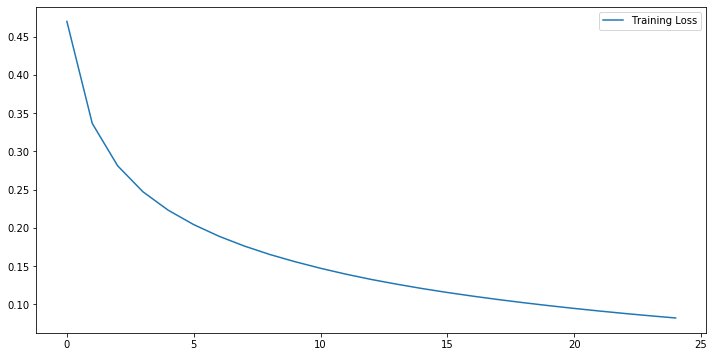

Accuracy on test set: 0.9519285714285715


In [6]:
NN = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          optimizers.Optimizer(np.zeros((20, 64))),
                          0.005,
                          64)

NN.train(X_train, y_train, 25, 0)
NN.plot_loss()

y_hat = NN.predict(X_test).T
y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit with validation split

Loss after 1 epochs: 0.596
Loss after 2 epochs: 0.362
Loss after 3 epochs: 0.286
Loss after 4 epochs: 0.244
Loss after 5 epochs: 0.216
Loss after 6 epochs: 0.196
Loss after 7 epochs: 0.179
Loss after 8 epochs: 0.166
Loss after 9 epochs: 0.155
Loss after 10 epochs: 0.147
Loss after 11 epochs: 0.138
Loss after 12 epochs: 0.131
Loss after 13 epochs: 0.125
Loss after 14 epochs: 0.118
Loss after 15 epochs: 0.113
Loss after 16 epochs: 0.108
Loss after 17 epochs: 0.104
Loss after 18 epochs: 0.100
Loss after 19 epochs: 0.096
Loss after 20 epochs: 0.092
Loss after 21 epochs: 0.089
Loss after 22 epochs: 0.086
Loss after 23 epochs: 0.083
Loss after 24 epochs: 0.080
Loss after 25 epochs: 0.077
Loss after 26 epochs: 0.075
Loss after 27 epochs: 0.072
Loss after 28 epochs: 0.070
Loss after 29 epochs: 0.068
Loss after 30 epochs: 0.066
Loss after 31 epochs: 0.064
Loss after 32 epochs: 0.062
Loss after 33 epochs: 0.060
Loss after 34 epochs: 0.058
Loss after 35 epochs: 0.056
Loss after 36 epochs: 0.055
L

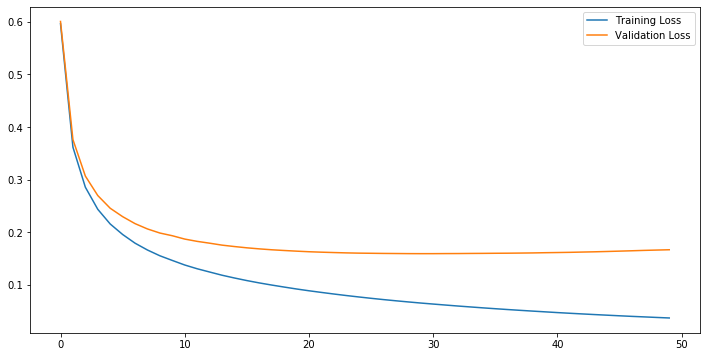

Accuracy on test set: 0.9538571428571428


In [7]:
NN2 = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          optimizers.Optimizer(np.zeros((20, 64))),
                          0.005,
                          64)
NN2.train(X_train,
          y_train,
          50,
          0.1)
NN2.plot_loss()

y_hat = NN2.predict(X_test).T
y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit without bias

Loss after 1 epochs: 0.619
Loss after 2 epochs: 0.376
Loss after 3 epochs: 0.297
Loss after 4 epochs: 0.253
Loss after 5 epochs: 0.224
Loss after 6 epochs: 0.203
Loss after 7 epochs: 0.186
Loss after 8 epochs: 0.173
Loss after 9 epochs: 0.161
Loss after 10 epochs: 0.151
Loss after 11 epochs: 0.142
Loss after 12 epochs: 0.134
Loss after 13 epochs: 0.127
Loss after 14 epochs: 0.121
Loss after 15 epochs: 0.115
Loss after 16 epochs: 0.110
Loss after 17 epochs: 0.105
Loss after 18 epochs: 0.101
Loss after 19 epochs: 0.097
Loss after 20 epochs: 0.093
Loss after 21 epochs: 0.089
Loss after 22 epochs: 0.086
Loss after 23 epochs: 0.083
Loss after 24 epochs: 0.079
Loss after 25 epochs: 0.077
Loss after 26 epochs: 0.074
Loss after 27 epochs: 0.071
Loss after 28 epochs: 0.069
Loss after 29 epochs: 0.066
Loss after 30 epochs: 0.064
Loss after 31 epochs: 0.062
Loss after 32 epochs: 0.060
Loss after 33 epochs: 0.058
Loss after 34 epochs: 0.056
Loss after 35 epochs: 0.054
Loss after 36 epochs: 0.052
L

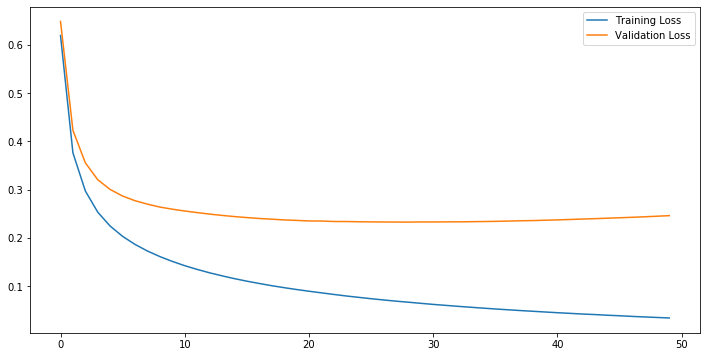

Accuracy on test set: 0.9577142857142857


In [8]:
NN3 = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          optimizers.Optimizer(np.zeros((20, 64))),
                          0.005,
                          64,
                          bias=False)
NN3.train(X_train,
          y_train,
          50,
          0.1)
NN3.plot_loss()

y_hat = NN3.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# SGD with momentum

Loss after 1 epochs: 2.006
Loss after 2 epochs: 1.648
Loss after 3 epochs: 1.282
Loss after 4 epochs: 1.016
Loss after 5 epochs: 0.846
Loss after 6 epochs: 0.727
Loss after 7 epochs: 0.642
Loss after 8 epochs: 0.579
Loss after 9 epochs: 0.532
Loss after 10 epochs: 0.496
Loss after 11 epochs: 0.468
Loss after 12 epochs: 0.444
Loss after 13 epochs: 0.425
Loss after 14 epochs: 0.408
Loss after 15 epochs: 0.393
Loss after 16 epochs: 0.380
Loss after 17 epochs: 0.368
Loss after 18 epochs: 0.358
Loss after 19 epochs: 0.348
Loss after 20 epochs: 0.340
Loss after 21 epochs: 0.332
Loss after 22 epochs: 0.325
Loss after 23 epochs: 0.319
Loss after 24 epochs: 0.313
Loss after 25 epochs: 0.307
Loss after 26 epochs: 0.302
Loss after 27 epochs: 0.297
Loss after 28 epochs: 0.293
Loss after 29 epochs: 0.288
Loss after 30 epochs: 0.284
Loss after 31 epochs: 0.280
Loss after 32 epochs: 0.276
Loss after 33 epochs: 0.273
Loss after 34 epochs: 0.269
Loss after 35 epochs: 0.266
Loss after 36 epochs: 0.262
L

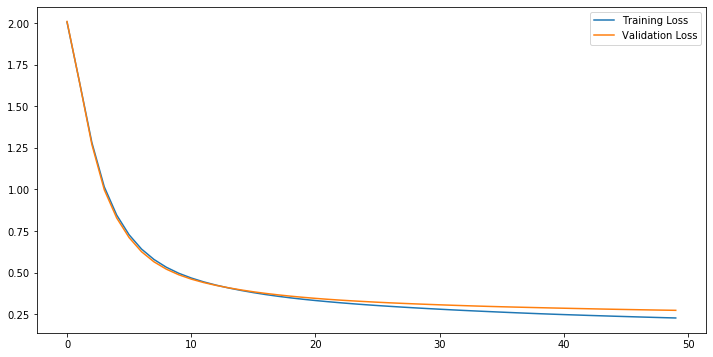

Accuracy on test set: 0.9196428571428571


In [9]:
NN4 = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          optimizers.GradientDescentWithMomentum(np.zeros((20, 64)), 0.9),
                          0.005,
                          64,
                          bias=False)
NN4.train(X_train,
          y_train,
          50,
          0.1)
NN4.plot_loss()

y_hat = NN4.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')